## BIOS Competition  2021 - Elevator Pitch Feedback

In [7]:
# Load Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
# Load generators
def bioswordcloud(text, show=True):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    #set the stopwords list
    stopwords= set(STOPWORDS)

    #append new words to the stopwords list
    with open("../data/filter-indo.txt", "r") as f:
        new_words = f.read().splitlines()
        f.close()
    new_stopwords=stopwords.union(new_words)

    #generate the word cloud with parameters
    wc = WordCloud(background_color="white", 
                   stopwords=new_stopwords,
                   normalize_plurals= True)
    wc.generate(text)
    if show == True:
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    else:
        pass
    return wc

def radial(X):
    labels=np.array(['Pemahaman mengenai permasalahan yang diangkat', 'Solusi yang ditawarkan melalui pendekatan biologi sintetik atau/dan bioinformatika', 'Potensi pengembangan dan kolaborasi dengan berbagai pihak.'])
    stats=df2.loc[X, labels].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    ax = plt.subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.2)
    labels2=np.array(['Permasalahan', 'Solusi', 'Potensi'])
    ax.set_thetagrids((angles * 180/np.pi)[0:3], labels2)
    ax.set_title(X)
    ax.set_rticks([1,2,3,4,5])
    ax.grid(True)
    return plt.show()

def team_feedback(X):
    pd.options.display.max_colwidth = None
    #print(X)
    radial(X)
    df_print = df[df['ID'] == X].loc[:, [
                                     'Apa yang menarik dari Proyek yang disajikan?',
                                     #'Pemahaman mengenai permasalahan yang diangkat',
                                     #'Solusi yang ditawarkan melalui pendekatan biologi sintetik atau/dan bioinformatika',
                                     #'Potensi pengembangan dan kolaborasi dengan berbagai pihak.',
                                     'Saran dan Kritik?']]
    bioswordcloud(str(df_abstract[df_abstract['name'] == X].abstract))
    
    return df_print

In [3]:
# load dataset
df_abstract = pd.read_csv('../data/abstract.csv')
df = pd.read_csv('../data/Elv_pitch.csv', encoding = "ISO-8859-1")
#df.head(2)

<AxesSubplot:xlabel='Total Nilai', ylabel='ID'>

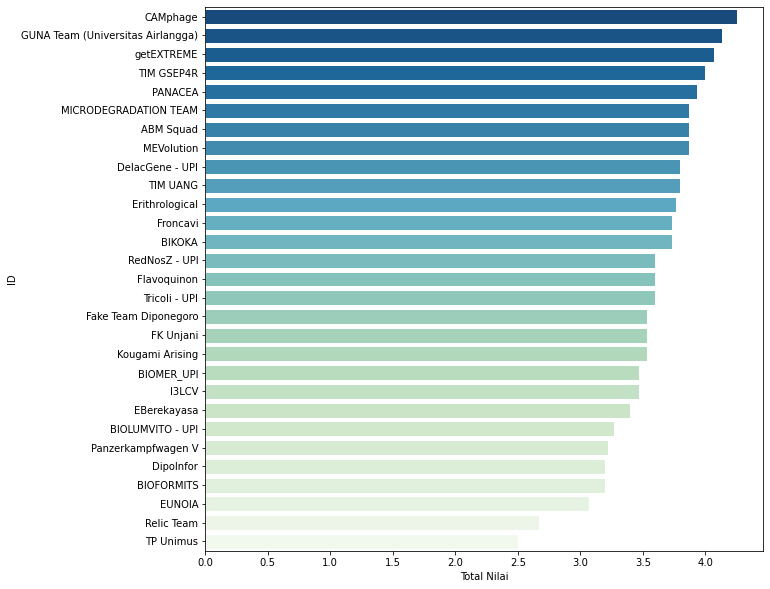

In [4]:
df2 = df.groupby(df['ID']).mean()
df2['Total Nilai'] = ((df2['Pemahaman mengenai permasalahan yang diangkat'] + df2['Solusi yang ditawarkan melalui pendekatan biologi sintetik atau/dan bioinformatika'] + df2['Potensi pengembangan dan kolaborasi dengan berbagai pihak.'])/3)
df2 = df2.sort_values('Total Nilai', ascending=False)
total = df2['Total Nilai']
plt.subplots(figsize=(10, 10))
sns.set_style("white")
sns.barplot(x=df2['Total Nilai'], y=df2.index, data=df2, palette='GnBu_r')

In [5]:
#daftar nama tim
print(df.ID.unique())

['ABM Squad' 'BIKOKA' 'BIOFORMITS' 'BIOLUMVITO - UPI' 'BIOMER_UPI'
 'CAMphage' 'DelacGene - UPI' 'DipoInfor' 'EBerekayasa' 'Erithrological'
 'EUNOIA' 'Fake Team Diponegoro' 'FK Unjani' 'Flavoquinon' 'Froncavi'
 'getEXTREME' 'GUNA Team (Universitas Airlangga)' 'I3LCV'
 'Kougami Arising' 'MEVolution' 'MICRODEGRADATION TEAM' 'PANACEA'
 'Panzerkampfwagen V' 'RedNosZ - UPI' 'Relic Team' 'TIM GSEP4R' 'TIM UANG'
 'TP Unimus' 'Tricoli - UPI']


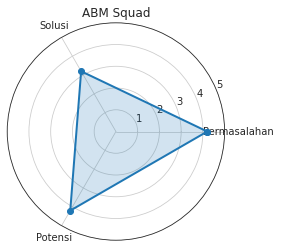

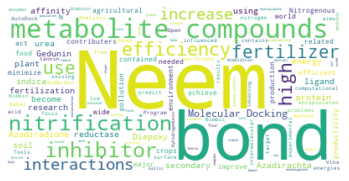

,Apa yang menarik dari Proyek yang disajikan?,Saran dan Kritik?
0,Penggunaan prinsip enkapsulasi urea dengan tanaman mimba sangat menarik dan tidak umum dipakai untuk molecular docking,"Ide ini menarik, walau mungkin peserta di akhir bisa mengemas apa yang didapat di hasil untuk prospek yang bisa dilakukan sehingga akan lebih baik. Meski demikian, konsep ide ini tidak umum dan layak dieksplorasi lagi lebih jauh"
1,enkapsulasi urea menggunakan tanaman,"Penggunaan analisis bioinformatika belum terlalu terlihat efektif, perlu penjelasan mekanisme proses dan penstrukturan penulisan"
2,Solusi yang ditawarkan sangat berhubungan dgn Indonesia sebagai negara agraris,"Bahaimana efisiensi pengikatan senyawa-senyawa yang sama tapi dari tanaman berbeda dan apakah hanya dilakukan skrining 10 senyawa tersebut, karena seharusnya skrining senyawa pasti banyak senyawa yang dipakai"
3,Topik yang diangkat (nitrification inhibitor) menarik dan banyak berhubungan dengan kehidupan masyarakat petani,"Berdasarkan abstrak yang diberikan, sepertinya penelitian sudah selesai? Bagaimana rencana pengembangan penelitian ini?"
4,Pupuk hayati berbasis inhibisi enzim nitrifikasi,Apakah ada kemungkinan senyawa yang digunakan memiliki daya alelopati?


In [48]:
#Ganti X dengan nama Tim, misal 'ABM Squad' (jangan lupa tanda ' ' nya)
X = 'ABM Squad' # Ganti nama tim disini
team_feedback(X)
